In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ttim

### Circular area-sink
Circular area-sink with radius 100 m, located at the origin.

self.neq  0
No unknowns. Solution complete


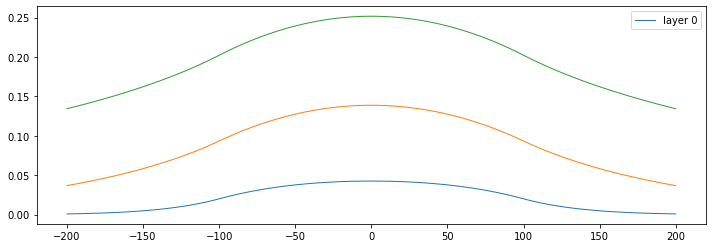

In [2]:
N = 0.001
R = 100
ml = ttim.ModelMaq(kaq=5, z=[10, 0], Saq=2e-4, tmin=1e-3, tmax=1e4)
ca = ttim.CircAreaSink(ml, 0, 0, 100, tsandN=[(0, 0.001)])
ml.solve()
ml.xsection(-200, 200, 0, 0, t=[0.1, 1, 10], figsize=(12, 4), sstart=-200)

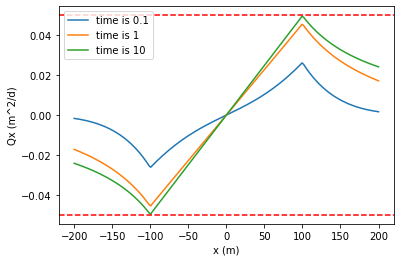

In [3]:
x = np.linspace(-200, 200, 200)
qx = np.zeros_like(x)
for t in [0.1, 1, 10]:
    for i in range(len(x)):
        qx[i], qy = ml.disvec(x[i], 1e-6, t)
    plt.plot(x, qx, label="time is " + str(t))
qxb = N * np.pi * R**2 / (2 * np.pi * R)
plt.axhline(qxb, color="r", ls="--")
plt.axhline(-qxb, color="r", ls="--")
plt.xlabel("x (m)")
plt.ylabel("Qx (m^2/d)")
plt.legend(loc="best")

### Circular area-sink and well
Discharge of well is the same as total infiltration rate of the circular area-sink.
Well and center of area-sink area located at equal distances from $y$-axis, so that the head remains
zero along the $y$-axis. Solution approaches steady-state solution.

In [4]:
N = 0.001
R = 100
Q = N * np.pi * R**2
ml = ttim.ModelMaq(kaq=5, z=[10, 0], Saq=2e-4, tmin=1e-3, tmax=1e4, M=10)
ca = ttim.CircAreaSink(ml, -200, 0, 100, tsandN=[(0, 0.001)])
w = ttim.Well(ml, 200, 0, rw=0.1, tsandQ=[(0, Q)])
ml.solve()

self.neq  1
solution complete


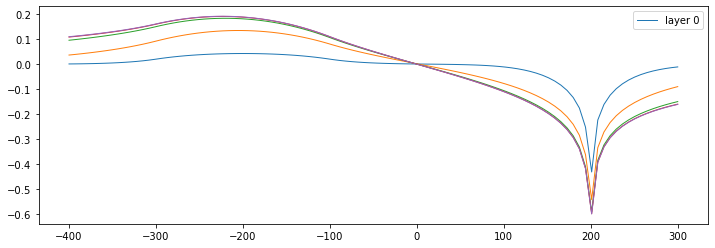

In [5]:
ml.xsection(-400, 300, 0, 0, t=[0.1, 1, 10, 100, 1000], figsize=(12, 4), sstart=-400)

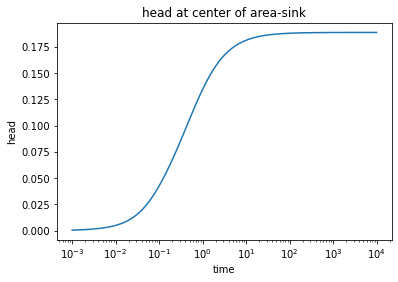

In [6]:
t = np.logspace(-3, 4, 100)
h = ml.head(-200, 0, t)
plt.semilogx(t, h[0])
plt.xlabel("time")
plt.ylabel("head")
plt.title("head at center of area-sink")

self.neq  1
solution complete


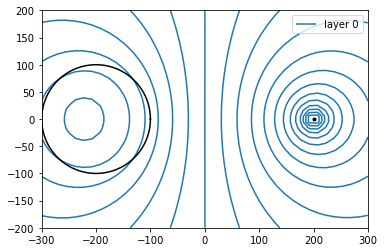

In [7]:
N = 0.001
R = 100
Q = N * np.pi * R**2
ml = ttim.ModelMaq(kaq=5, z=[10, 0], Saq=2e-4, tmin=10, tmax=100, M=10)
ca = ttim.CircAreaSink(ml, -200, 0, 100, tsandN=[(0, 0.001)])
w = ttim.Well(ml, 200, 0, rw=0.1, tsandQ=[(0, Q)])
ml.solve()
ml.contour([-300, 300, -200, 200], ngr=40, t=20)

### Two layers
Discharge of well is the same as total infiltration rate of the circular area-sink. Center of area-sink and well are at the origin. Circular area-sink in layer 0, well in layer 1. 

In [8]:
N = 0.001
R = 100
Q = N * np.pi * R**2
ml = ttim.ModelMaq(
    kaq=[5, 20],
    z=[20, 12, 10, 0],
    c=[1000],
    Saq=[2e-4, 1e-4],
    tmin=1e-3,
    tmax=1e4,
    M=10,
)
ca = ttim.CircAreaSink(ml, 0, 0, 100, tsandN=[(0, 0.001)])
w = ttim.Well(ml, 0, 0, rw=0.1, tsandQ=[(0, Q)], layers=1)
ml.solve()

self.neq  1
solution complete


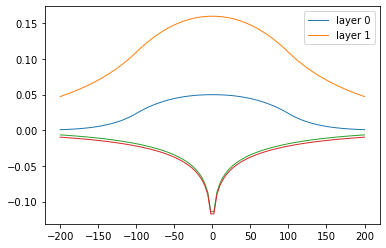

In [9]:
ml.xsection(-200, 200, 0, 0, t=[0.1, 100], layers=[0, 1], sstart=-200)

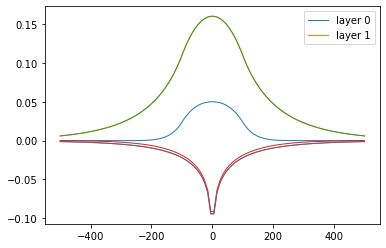

In [10]:
ml.xsection(-500, 500, 0, 0, t=[0.1, 100, 1000], layers=[0, 1], sstart=-500)